In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Set display options for better viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set matplotlib style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries imported successfully!")

Matplotlib is building the font cache; this may take a moment.


All libraries imported successfully!


In [2]:
# Load the CSV file
# Note: We go up one level (..) to access the data folder
df = pd.read_csv('../data/sales_data.csv')

print("Data loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Data loaded successfully!
Dataset shape: (1000, 8)
Dataset has 1000 rows and 8 columns


In [3]:
# Display first 5 rows
print("FIRST 5 ROWS OF DATA:")
print("=" * 50)
print(df.head())

FIRST 5 ROWS OF DATA:
         Date     Product Region Salesperson  Quantity  Unit_Price  Discount  \
0  2023-04-13  Headphones  North     Charlie         8     1237.45      0.05   
1  2023-08-03      Tablet   East         Eve         4      371.45      0.20   
2  2023-11-05       Phone   West       Diana         6      101.48      0.30   
3  2023-06-10  Headphones  South         Eve         9      653.34      0.18   
4  2023-06-19  Headphones   West     Charlie         7     1968.14      0.14   

   Total_Sales  
0      9404.62  
1      1188.64  
2       426.22  
3      4821.65  
4     11848.20  


In [4]:
# Display last 5 rows
print("LAST 5 ROWS OF DATA:")
print("=" * 50)
print(df.tail())

LAST 5 ROWS OF DATA:
           Date     Product Region Salesperson  Quantity  Unit_Price  \
995  2023-09-16  Headphones   East       Alice         1      296.60   
996  2023-05-12  Headphones  South         Eve         4      461.43   
997  2023-07-07      Tablet   West       Diana         9     1191.71   
998  2023-03-24      Laptop  North     Charlie         6      959.50   
999  2023-12-23     Monitor   West       Diana         4     1855.09   

     Discount  Total_Sales  
995      0.20       237.28  
996      0.16      1550.40  
997      0.15      9116.58  
998      0.22      4490.46  
999      0.25      5565.27  


In [5]:
# Display column names and data types
print("COLUMN INFORMATION:")
print("=" * 50)
print("Column names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

print("\nData types:")
print(df.dtypes)

COLUMN INFORMATION:
Column names:
1. Date
2. Product
3. Region
4. Salesperson
5. Quantity
6. Unit_Price
7. Discount
8. Total_Sales

Data types:
Date            object
Product         object
Region          object
Salesperson     object
Quantity         int64
Unit_Price     float64
Discount       float64
Total_Sales    float64
dtype: object


In [6]:
# Display basic statistics
print("BASIC STATISTICS:")
print("=" * 50)
print(df.describe())

BASIC STATISTICS:
          Quantity   Unit_Price     Discount   Total_Sales
count  1000.000000  1000.000000  1000.000000   1000.000000
mean      4.908000  1022.192470     0.150920   4289.976030
std       2.610431   549.190775     0.084628   3500.957217
min       1.000000   100.020000     0.000000    102.170000
25%       3.000000   546.480000     0.080000   1415.822500
50%       5.000000  1021.820000     0.150000   3255.195000
75%       7.000000  1494.972500     0.220000   6317.000000
max       9.000000  1998.770000     0.300000  16679.060000


In [7]:
# Check for missing values
print("MISSING VALUES CHECK:")
print("=" * 50)
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("\n✓ No missing values found!")
else:
    print(f"\n⚠ Total missing values: {missing_values.sum()}")

MISSING VALUES CHECK:
Date           0
Product        0
Region         0
Salesperson    0
Quantity       0
Unit_Price     0
Discount       0
Total_Sales    0
dtype: int64

✓ No missing values found!


In [8]:
# Check for duplicate rows
print("DUPLICATE ROWS CHECK:")
print("=" * 50)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates == 0:
    print("✓ No duplicate rows found!")
else:
    print(f"⚠ Found {duplicates} duplicate rows")

DUPLICATE ROWS CHECK:
Number of duplicate rows: 0
✓ No duplicate rows found!


In [9]:
# Convert Date column to datetime format
print("CONVERTING DATE COLUMN:")
print("=" * 50)

# Check current data type of Date column
print(f"Current Date column type: {df['Date'].dtype}")

# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

print(f"New Date column type: {df['Date'].dtype}")
print("✓ Date column converted successfully!")

CONVERTING DATE COLUMN:
Current Date column type: object
New Date column type: datetime64[ns]
✓ Date column converted successfully!


In [10]:
# Create additional date-based columns for analysis
print("CREATING ADDITIONAL DATE COLUMNS:")
print("=" * 50)

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()
df['Quarter'] = df['Date'].dt.quarter
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Week_Number'] = df['Date'].dt.isocalendar().week

print("New columns created:")
new_cols = ['Year', 'Month', 'Month_Name', 'Quarter', 'Day_of_Week', 'Week_Number']
for col in new_cols:
    print(f"✓ {col}")

# Display sample of new columns
print("\nSample of new date columns:")
print(df[['Date'] + new_cols].head())

CREATING ADDITIONAL DATE COLUMNS:
New columns created:
✓ Year
✓ Month
✓ Month_Name
✓ Quarter
✓ Day_of_Week
✓ Week_Number

Sample of new date columns:
        Date  Year  Month Month_Name  Quarter Day_of_Week  Week_Number
0 2023-04-13  2023      4      April        2    Thursday           15
1 2023-08-03  2023      8     August        3    Thursday           31
2 2023-11-05  2023     11   November        4      Sunday           44
3 2023-06-10  2023      6       June        2    Saturday           23
4 2023-06-19  2023      6       June        2      Monday           25


In [11]:
# Analysis 1: Sales by Product using groupby() and sum()
print("ANALYSIS 1: SALES BY PRODUCT")
print("=" * 60)

# Group by Product and calculate various metrics
product_analysis = df.groupby('Product').agg({
    'Total_Sales': ['sum', 'mean', 'count'],
    'Quantity': 'sum',
    'Unit_Price': 'mean',
    'Discount': 'mean'
}).round(2)

# Flatten column names
product_analysis.columns = [
    'Total_Sales_Sum', 'Average_Sale_Amount', 'Number_of_Sales',
    'Total_Quantity_Sold', 'Average_Unit_Price', 'Average_Discount'
]

# Sort by total sales (highest first)
product_analysis = product_analysis.sort_values('Total_Sales_Sum', ascending=False)

print("Product Performance Summary:")
print(product_analysis)

# Find the best performing product
best_product = product_analysis.index[0]
best_product_sales = product_analysis.loc[best_product, 'Total_Sales_Sum']

print(f"\n🏆 BEST PERFORMING PRODUCT: {best_product}")
print(f"💰 Total Sales: ${best_product_sales:,.2f}")

ANALYSIS 1: SALES BY PRODUCT
Product Performance Summary:
            Total_Sales_Sum  Average_Sale_Amount  Number_of_Sales  \
Product                                                             
Phone             904348.19              4544.46              199   
Headphones        892269.48              4189.06              213   
Tablet            874090.52              4084.54              214   
Monitor           813590.86              4237.45              192   
Laptop            805676.98              4426.80              182   

            Total_Quantity_Sold  Average_Unit_Price  Average_Discount  
Product                                                                
Phone                      1007             1052.66              0.15  
Headphones                 1012             1028.35              0.15  
Tablet                     1038              970.84              0.15  
Monitor                     937             1039.92              0.15  
Laptop                    

In [12]:
# Analysis 2: Sales by Region using groupby() and sum()
print("ANALYSIS 2: SALES BY REGION")
print("=" * 60)

# Group by Region and calculate metrics
region_analysis = df.groupby('Region').agg({
    'Total_Sales': ['sum', 'mean', 'count'],
    'Quantity': 'sum',
    'Discount': 'mean'
}).round(2)

# Flatten column names
region_analysis.columns = [
    'Total_Sales_Sum', 'Average_Sale_Amount', 'Number_of_Sales',
    'Total_Quantity_Sold', 'Average_Discount'
]

# Sort by total sales
region_analysis = region_analysis.sort_values('Total_Sales_Sum', ascending=False)

print("Regional Performance Summary:")
print(region_analysis)

# Calculate percentage contribution of each region
region_analysis['Sales_Percentage'] = (
    region_analysis['Total_Sales_Sum'] / region_analysis['Total_Sales_Sum'].sum() * 100
).round(2)

print("\nRegional Sales Percentage:")
for region in region_analysis.index:
    percentage = region_analysis.loc[region, 'Sales_Percentage']
    print(f"{region}: {percentage}%")

# Find best performing region
best_region = region_analysis.index[0]
print(f"\n🏆 BEST PERFORMING REGION: {best_region}")

ANALYSIS 2: SALES BY REGION
Regional Performance Summary:
        Total_Sales_Sum  Average_Sale_Amount  Number_of_Sales  \
Region                                                          
West         1140226.02              4597.69              248   
North        1119507.31              4177.27              268   
South        1081920.24              4082.72              265   
East          948322.46              4330.24              219   

        Total_Quantity_Sold  Average_Discount  
Region                                         
West                   1276              0.16  
North                  1297              0.15  
South                  1259              0.15  
East                   1076              0.14  

Regional Sales Percentage:
West: 26.58%
North: 26.1%
South: 25.22%
East: 22.11%

🏆 BEST PERFORMING REGION: West


In [13]:
# Analysis 3: Monthly Sales Trend using groupby() and sum()
print("ANALYSIS 3: MONTHLY SALES TREND")
print("=" * 60)

# Group by Year and Month
monthly_sales = df.groupby(['Year', 'Month', 'Month_Name']).agg({
    'Total_Sales': 'sum',
    'Quantity': 'sum',
    'Total_Sales': 'count'  # This will count number of transactions
}).round(2)

# Flatten columns
monthly_sales.columns = ['Total_Sales_Sum', 'Total_Quantity', 'Number_of_Transactions']

# Reset index to make it easier to work with
monthly_sales = monthly_sales.reset_index()

# Create a proper date column for plotting
monthly_sales['Date'] = pd.to_datetime(
    monthly_sales[['Year', 'Month']].assign(day=1)
)

# Sort by date
monthly_sales = monthly_sales.sort_values('Date')

print("Monthly Sales Summary:")
print(monthly_sales[['Month_Name', 'Total_Sales_Sum', 'Total_Quantity', 'Number_of_Transactions']])

# Find best and worst months
best_month_idx = monthly_sales['Total_Sales_Sum'].idxmax()
worst_month_idx = monthly_sales['Total_Sales_Sum'].idxmin()

best_month = monthly_sales.loc[best_month_idx, 'Month_Name']
best_month_sales = monthly_sales.loc[best_month_idx, 'Total_Sales_Sum']

worst_month = monthly_sales.loc[worst_month_idx, 'Month_Name']
worst_month_sales = monthly_sales.loc[worst_month_idx, 'Total_Sales_Sum']

print(f"\n🏆 BEST MONTH: {best_month} (${best_month_sales:,.2f})")
print(f"📉 LOWEST MONTH: {worst_month} (${worst_month_sales:,.2f})")

ANALYSIS 3: MONTHLY SALES TREND


ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

In [14]:
# Analysis 4: Salesperson Performance using groupby() and sum()
print("ANALYSIS 4: SALESPERSON PERFORMANCE")
print("=" * 60)

# Group by Salesperson
salesperson_analysis = df.groupby('Salesperson').agg({
    'Total_Sales': ['sum', 'mean', 'count'],
    'Quantity': 'sum',
    'Discount': 'mean'
}).round(2)

# Flatten column names
salesperson_analysis.columns = [
    'Total_Sales_Sum', 'Average_Sale_Amount', 'Number_of_Sales',
    'Total_Quantity_Sold', 'Average_Discount_Given'
]

# Sort by total sales
salesperson_analysis = salesperson_analysis.sort_values('Total_Sales_Sum', ascending=False)

print("Salesperson Performance Summary:")
print(salesperson_analysis)

# Rank salespeople
salesperson_analysis['Rank'] = range(1, len(salesperson_analysis) + 1)

print(f"\n🏆 TOP SALESPERSON: {salesperson_analysis.index[0]}")
print(f"💰 Total Sales: ${salesperson_analysis.iloc[0]['Total_Sales_Sum']:,.2f}")
print(f"📊 Number of Sales: {salesperson_analysis.iloc[0]['Number_of_Sales']}")

ANALYSIS 4: SALESPERSON PERFORMANCE
Salesperson Performance Summary:
             Total_Sales_Sum  Average_Sale_Amount  Number_of_Sales  \
Salesperson                                                          
Bob                909907.30              4438.57              205   
Charlie            902450.40              4489.80              201   
Diana              856460.13              4177.85              205   
Alice              820821.96              4209.34              195   
Eve                800336.24              4125.44              194   

             Total_Quantity_Sold  Average_Discount_Given  
Salesperson                                               
Bob                         1025                    0.15  
Charlie                     1018                    0.16  
Diana                       1033                    0.15  
Alice                        911                    0.15  
Eve                          921                    0.15  

🏆 TOP SALESPERSON: Bob
💰 T

In [15]:
# Analysis 5: Multi-level Grouping - Product and Region
print("ANALYSIS 5: PRODUCT PERFORMANCE BY REGION")
print("=" * 60)

# Group by both Product and Region
product_region_analysis = df.groupby(['Product', 'Region'])['Total_Sales'].sum().round(2)

print("Sales by Product and Region:")
print(product_region_analysis)

# Convert to pivot table for better visualization
pivot_table = df.pivot_table(
    values='Total_Sales',
    index='Product',
    columns='Region',
    aggfunc='sum',
    fill_value=0
).round(2)

print("\nPivot Table - Products vs Regions:")
print(pivot_table)

# Find best product-region combination
max_combination = product_region_analysis.idxmax()
max_sales = product_region_analysis.max()

print(f"\n🏆 BEST PRODUCT-REGION COMBINATION:")
print(f"Product: {max_combination[0]}")
print(f"Region: {max_combination[1]}")
print(f"Sales: ${max_sales:,.2f}")

ANALYSIS 5: PRODUCT PERFORMANCE BY REGION
Sales by Product and Region:
Product     Region
Headphones  East      140945.21
            North     230886.94
            South     240129.07
            West      280308.26
Laptop      East      191862.78
            North     236943.86
            South     195518.74
            West      181351.60
Monitor     East      205415.12
            North     186500.13
            South     251721.54
            West      169954.07
Phone       East      204687.56
            North     228274.07
            South     241524.29
            West      229862.27
Tablet      East      205411.79
            North     236902.31
            South     153026.60
            West      278749.82
Name: Total_Sales, dtype: float64

Pivot Table - Products vs Regions:
Region           East      North      South       West
Product                                               
Headphones  140945.21  230886.94  240129.07  280308.26
Laptop      191862.78  236943.86  1

CREATING VISUALIZATION 1: PRODUCT SALES BAR CHART


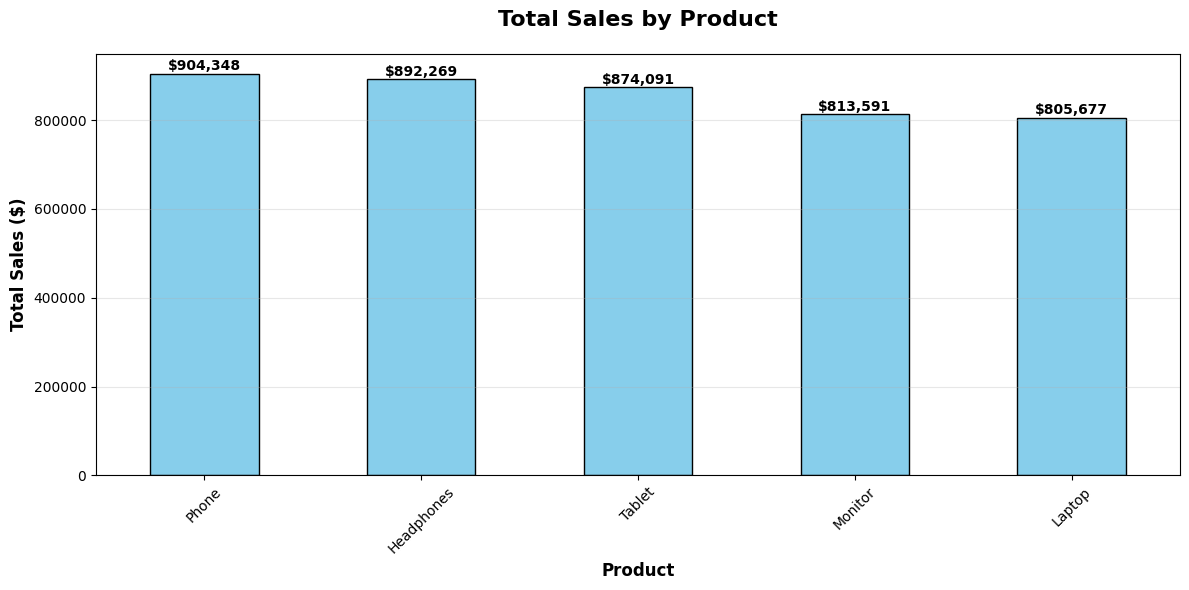

✓ Chart saved to: charts/product_sales_bar_chart.png


In [16]:
# Visualization 1: Product Sales Bar Chart
print("CREATING VISUALIZATION 1: PRODUCT SALES BAR CHART")
print("=" * 60)

# Create figure and axis
plt.figure(figsize=(12, 6))

# Create bar chart using plot()
product_sales_data = df.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False)
product_sales_data.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the chart
plt.title('Total Sales by Product', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Product', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(product_sales_data.values):
    plt.text(i, v + 1000, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()

# Save the chart
plt.savefig('../charts/product_sales_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Chart saved to: charts/product_sales_bar_chart.png")

CREATING VISUALIZATION 2: REGIONAL SALES PIE CHART


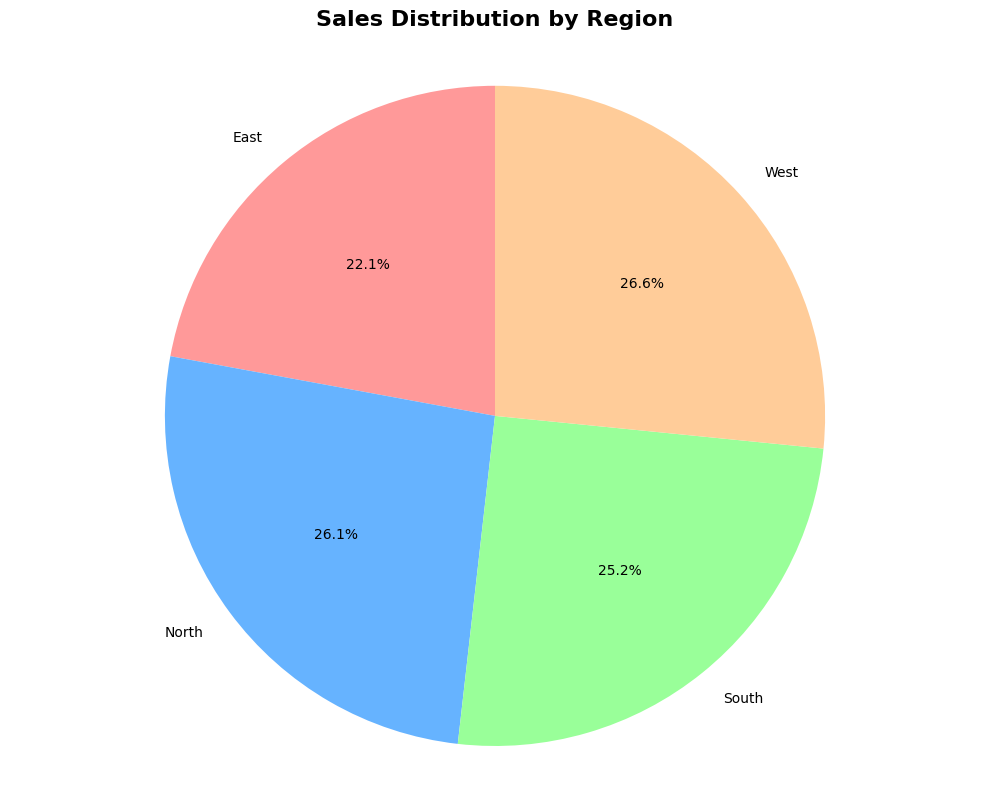

✓ Chart saved to: charts/regional_sales_pie_chart.png


In [17]:
# Visualization 2: Regional Sales Pie Chart
print("CREATING VISUALIZATION 2: REGIONAL SALES PIE CHART")
print("=" * 60)

# Create figure
plt.figure(figsize=(10, 8))

# Prepare data for pie chart
region_sales_data = df.groupby('Region')['Total_Sales'].sum()

# Create pie chart using plot()
region_sales_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                       colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])

# Customize the chart
plt.title('Sales Distribution by Region', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('')  # Remove the default ylabel

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.tight_layout()

# Save the chart
plt.savefig('../charts/regional_sales_pie_chart.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Chart saved to: charts/regional_sales_pie_chart.png")

CREATING VISUALIZATION 3: MONTHLY SALES TREND


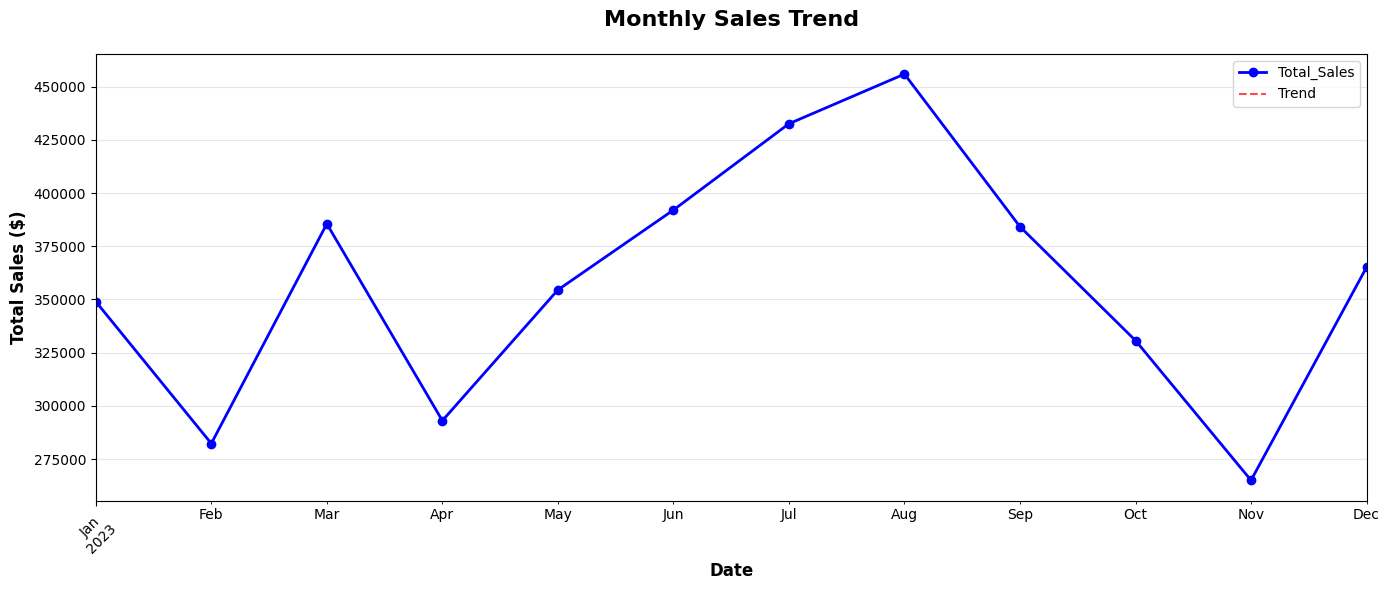

✓ Chart saved to: charts/monthly_sales_trend.png


In [18]:
# Visualization 3: Monthly Sales Trend Line Chart
print("CREATING VISUALIZATION 3: MONTHLY SALES TREND")
print("=" * 60)

# Prepare monthly data for line chart
monthly_trend = df.groupby(['Year', 'Month'])['Total_Sales'].sum().reset_index()
monthly_trend['Date'] = pd.to_datetime(monthly_trend[['Year', 'Month']].assign(day=1))
monthly_trend = monthly_trend.sort_values('Date')

# Create figure
plt.figure(figsize=(14, 6))

# Create line chart using plot()
monthly_trend.set_index('Date')['Total_Sales'].plot(kind='line', marker='o', 
                                                    linewidth=2, markersize=6, 
                                                    color='blue')

# Customize the chart
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add trend line
z = np.polyfit(range(len(monthly_trend)), monthly_trend['Total_Sales'], 1)
p = np.poly1d(z)
plt.plot(monthly_trend['Date'], p(range(len(monthly_trend))), "--", color='red', alpha=0.7, label='Trend')
plt.legend()

plt.tight_layout()

# Save the chart
plt.savefig('../charts/monthly_sales_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Chart saved to: charts/monthly_sales_trend.png")

CREATING VISUALIZATION 4: SALESPERSON PERFORMANCE


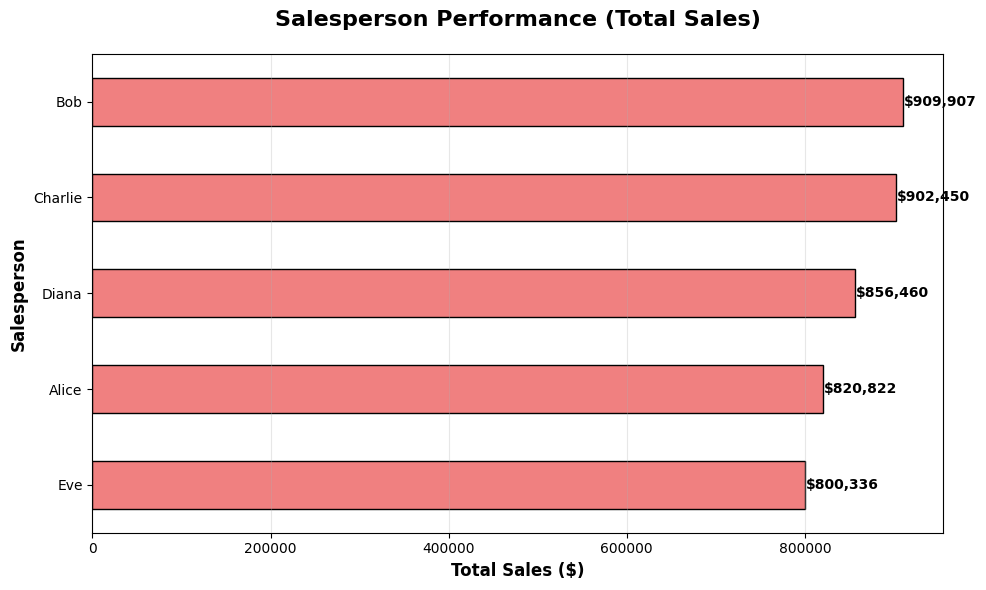

✓ Chart saved to: charts/salesperson_performance.png


In [19]:
# Visualization 4: Salesperson Performance Horizontal Bar Chart
print("CREATING VISUALIZATION 4: SALESPERSON PERFORMANCE")
print("=" * 60)

# Prepare salesperson data
salesperson_data = df.groupby('Salesperson')['Total_Sales'].sum().sort_values(ascending=True)

# Create figure
plt.figure(figsize=(10, 6))

# Create horizontal bar chart using plot()
salesperson_data.plot(kind='barh', color='lightcoral', edgecolor='black')

# Customize the chart
plt.title('Salesperson Performance (Total Sales)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total Sales ($)', fontsize=12, fontweight='bold')
plt.ylabel('Salesperson', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(salesperson_data.values):
    plt.text(v + 1000, i, f'${v:,.0f}', va='center', fontweight='bold')

plt.tight_layout()

# Save the chart
plt.savefig('../charts/salesperson_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Chart saved to: charts/salesperson_performance.png")

CREATING VISUALIZATION 5: DASHBOARD WITH MULTIPLE CHARTS


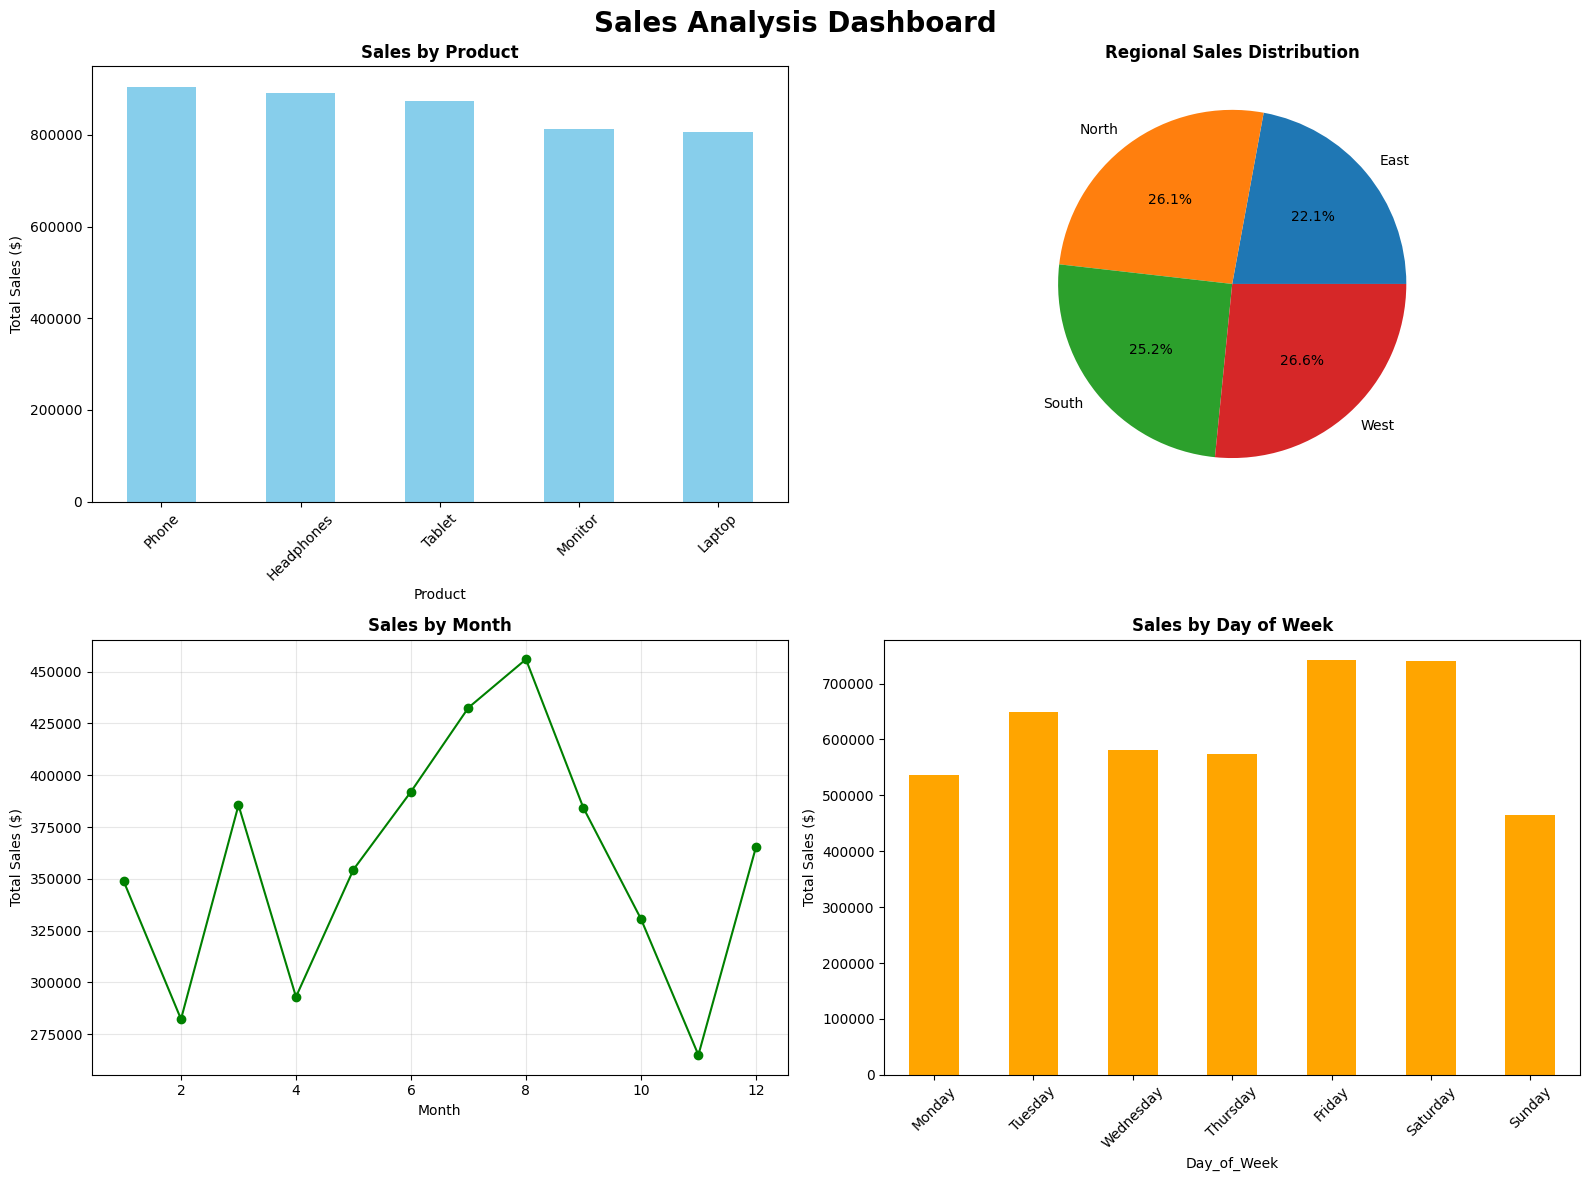

✓ Dashboard saved to: charts/sales_dashboard.png


In [20]:
# Visualization 5: Multiple Charts in One Figure
print("CREATING VISUALIZATION 5: DASHBOARD WITH MULTIPLE CHARTS")
print("=" * 60)

# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Sales Analysis Dashboard', fontsize=20, fontweight='bold')

# Chart 1: Product Sales (Top Left)
product_sales = df.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False)
product_sales.plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Sales by Product', fontweight='bold')
axes[0,0].set_ylabel('Total Sales ($)')
axes[0,0].tick_params(axis='x', rotation=45)

# Chart 2: Regional Distribution (Top Right)
region_sales = df.groupby('Region')['Total_Sales'].sum()
region_sales.plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%')
axes[0,1].set_title('Regional Sales Distribution', fontweight='bold')
axes[0,1].set_ylabel('')

# Chart 3: Monthly Trend (Bottom Left)
monthly_data = df.groupby('Month')['Total_Sales'].sum()
monthly_data.plot(kind='line', ax=axes[1,0], marker='o', color='green')
axes[1,0].set_title('Sales by Month', fontweight='bold')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Total Sales ($)')
axes[1,0].grid(True, alpha=0.3)

# Chart 4: Day of Week Analysis (Bottom Right)
dow_sales = df.groupby('Day_of_Week')['Total_Sales'].sum()
# Reorder days of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_sales = dow_sales.reindex([day for day in day_order if day in dow_sales.index])
dow_sales.plot(kind='bar', ax=axes[1,1], color='orange')
axes[1,1].set_title('Sales by Day of Week', fontweight='bold')
axes[1,1].set_ylabel('Total Sales ($)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()

# Save the dashboard
plt.savefig('../charts/sales_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Dashboard saved to: charts/sales_dashboard.png")

In [21]:
# Generate comprehensive summary insights
print("GENERATING COMPREHENSIVE SALES ANALYSIS REPORT")
print("=" * 80)

# Calculate key metrics
total_revenue = df['Total_Sales'].sum()
total_transactions = len(df)
average_order_value = df['Total_Sales'].mean()
total_quantity_sold = df['Quantity'].sum()
average_discount = df['Discount'].mean()

# Get best performers
best_product = df.groupby('Product')['Total_Sales'].sum().idxmax()
best_region = df.groupby('Region')['Total_Sales'].sum().idxmax()
best_salesperson = df.groupby('Salesperson')['Total_Sales'].sum().idxmax()
best_month = df.groupby('Month_Name')['Total_Sales'].sum().idxmax()

# Get worst performers
worst_product = df.groupby('Product')['Total_Sales'].sum().idxmin()
worst_region = df.groupby('Region')['Total_Sales'].sum().idxmin()
worst_salesperson

GENERATING COMPREHENSIVE SALES ANALYSIS REPORT


NameError: name 'worst_salesperson' is not defined